In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
import xlrd
import re
warnings.filterwarnings('ignore')

%matplotlib inline

# Additional Information
**This File Is Organized For Better Visualization. Some Unimportant Raw Codes, Unimportant Exploratory, and Unimportant Columns Checking Are Done In Other File**


# Column Information


**Invoice : Concatenated Invoice and Line Number Associated With The Liquor Order. This Provide A Unique Identifier For The Individual Liquor Products Included In Store Order**

**Date : Date Of Order**

**Store Number : Unique Number Assigned To The Store Who Ordered The Liquor**

**Store Name : Store Who Order The Liquor**

**City : City Where The Store Who Ordered Liquor Located**

**Zipcode : Zipcode Where The Store Who Ordered Liquor Located**

**Store Location : Location Where The Store Who Ordered Liquor Located. Address, City, State, Zipcode Are Geocoded To Provide Geographic Coordinates. Accuracy Of Geocoding Is Dependent On How Well The Address Is Interpreted and The Completeness Of The Refference Data Used**

**County Number : Iowa County Number For The County Where The Store Who Ordered Liquor Located**

**County : County Where The Store Who Ordered Liquor Located**

**Category : Category Code Associated With Liquor Ordered**

**Category Name : Category Of The Liquor Ordered**

**Vendor Number : The Vendor Of The Company For The Brand Of Liquor Ordered**

**Vendor Name : The Vendor Name Of The Company For The Brand Of Liquor Ordered**

**Item Number : Item Number For The Individual Liquor Product Ordered**

**Item Description : Description Of The Individual Liquor Product Ordered**

**Pack : The Number Of Bottles In A Case For The Liquor Order**

**Bottle Volume(ml) : Volume Of Each Liquor Bottles Order In Milliliters**

**State Bottle Cost : The Amount That Alcoholic Beverages Division Paid For Each Bottle Of Liquor Ordered**

**State Bottle Retail : The Amount The Store Paid For Each Bottle Of Liquor Ordered**

**Bottles Sold : The Number of Bottles of Liquor Ordered By The Store**

**Sale (Dollars) : Total Cost of Liquor Order (Number of Bottles Multiplied By The State Bottle Retail**

**Volume Sold (Liters) : Total Volume of Liquor Ordered In Liters. (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000)**

**Volume Sold (Gallons) : Total Volume of Liquor Ordered In Gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784)**

** **

# Iowa State Liquor Revenue


**2012 : $ 242,248,000**

**2013 : $ 255,846,000**

**2014 : $ 263,495,000**

**2015 : $ 277,706,000**

**2016 : $ 288,908,000**

**2017 : $ 305,619,000**

**2018 : $ 320,049,812**

**2019 : $ 339,537,641**

**2020 : $ 367,284,902**

**2012-2020 Revenue : $ 2,660,694,355**

**Source : Iowa Alcoholic Beverage Division 2012-2020 Reports**

# Total Gallons Sold

**2012 : 4,859,877**

**2013 : 4,951,393**

**2014 : 5,028,782**

**2015 : 5,157,153**

**2016 : 5,283,531**

**2017 : 5,508,217**

**2018 : 5,666,844**

**2019 : 5,867,860**

**2020 : 6,057,144**

**2012-2020 Gallons : 48,380,801**

**Source : Iowa Alcoholic Beverage Division 2012-2020 Reports**

** **

# 2020 Alcoholic Beverages Outlook

**Despite Unstable Economic Condition and Covid-19 Pandemic, Alcoholic Beverages Sales In The United States Does Not Seems To Lower. In Fact, Some Sources Reported A Rise In Alcoholic Beverages Sales**

**A Source Stated That, Post-Traumatic Events Can Cause A Significant Rise In Alcoholic Beverages Sales**

https://www.npr.org/2020/09/11/908773533/hangover-from-alcohol-boom-could-last-long-after-pandemic-ends

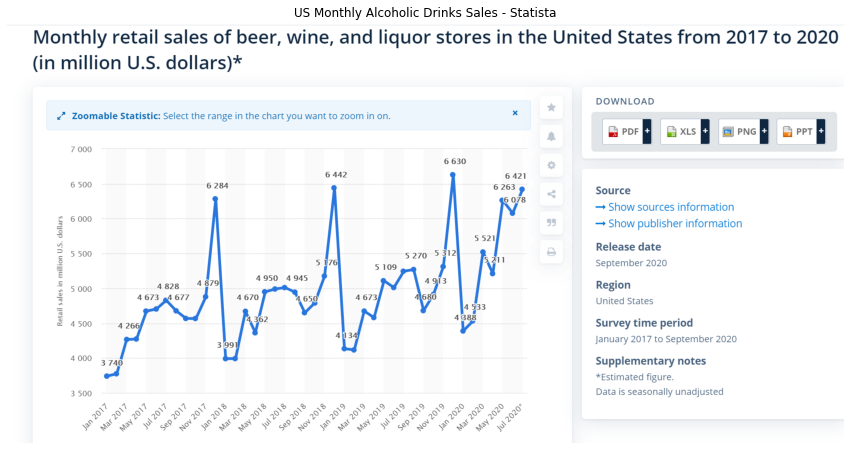

In [2]:
img1 = mpimg.imread('USAlcoholSales.png')

plt.figure(figsize=(15, 8))
plt.axis('off')
plt.title('US Monthly Alcoholic Drinks Sales - Statista')
imgplot = plt.imshow(img1)
plt.show()

In [3]:
df = pd.read_csv('iowa_liquor_sales_50.csv')
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-09619700004,2018-01-05,5416,Depot Liquor & Grocery,114 N Center St.,Marshalltown,50158,POINT (-92.912975 42.051619),64.0,MARSHALL,...,48108,Hennessy Vs Cognac,6,1750,45.99,68.99,18,1214.82,31.50,8.32
1,S24281500036,2015-03-02,4223,STATION MART LIQUOR AND TOBACCO,1119 RIVER FOREST RD,EVANSDALE,50707,POINT (-92.297765 42.462807),7.0,Black Hawk,...,77776,Wild Turkey American Honey,12,750,10.50,15.75,3,47.25,2.25,0.59
2,S30110400005,2016-01-11,5138,Kellogg Country Store,"103, BLAIR ST",KELLOGG,50135,POINT (-92.903113 41.7144),50.0,Jasper,...,25604,Seagrams 7 Crown Bl Whiskey,24,375,3.50,5.25,24,126.00,9.00,2.38
3,INV-13037900012,2018-07-03,3622,Wal-Mart 1415 / Spirit Lake,2600 Hwy 71,Spirit Lake,51360,POINT (-95.126535 43.416452),30.0,DICKINSON,...,42716,Malibu Coconut Rum,12,750,7.49,11.24,48,539.52,36.00,9.51
4,INV-20965600019,2019-07-31,2500,Hy-Vee Food Store #1 / Ames,3800 W Lincoln Way,Ames,50010,NaN,85.0,STORY,...,15776,Bushmills Irish Whiskey,12,750,14.00,21.00,4,84.00,3.00,0.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  50000 non-null  object 
 1   date                     50000 non-null  object 
 2   store_number             50000 non-null  int64  
 3   store_name               50000 non-null  object 
 4   address                  49814 non-null  object 
 5   city                     49814 non-null  object 
 6   zip_code                 49813 non-null  object 
 7   store_location           45169 non-null  object 
 8   county_number            49623 non-null  float64
 9   county                   49623 non-null  object 
 10  category                 49952 non-null  float64
 11  category_name            49931 non-null  object 
 12  vendor_number            50000 non-null  int64  
 13  vendor_name              50000 non-null  object 
 14  item_number           

In [5]:
df.nunique()

invoice_and_item_number    50000
date                        2131
store_number                2167
store_name                  2257
address                     3168
city                         767
zip_code                     464
store_location              1733
county_number                 99
county                       199
category                      94
category_name                121
vendor_number                148
vendor_name                  219
item_number                 3020
item_description            2831
pack                          15
bottle_volume_ml              31
state_bottle_cost           1486
state_bottle_retail         1720
bottles_sold                  86
sale_dollars                5847
volume_sold_liters           186
volume_sold_gallons          230
dtype: int64

In [6]:
df.min()

invoice_and_item_number                                  378900030
date                                                    2012-01-03
store_number                                                  2106
store_name                             "Double ""D"" Liquor Store"
county_number                                                    1
category                                                1.0111e+06
vendor_number                                                   10
vendor_name                                       3 Badge Mixology
item_number                                                    115
item_description           "Jose Cuervo Silver ""Rolling Stones"""
pack                                                             1
bottle_volume_ml                                                20
state_bottle_cost                                                0
state_bottle_retail                                              0
bottles_sold                                                  

In [7]:
df.max()

invoice_and_item_number                  S34159000017
date                                       2021-01-29
store_number                                     9931
store_name                         goPuff / Iowa City
county_number                                      99
category                                   1.9012e+06
vendor_number                                     978
vendor_name                Yahara Bay Distillers, Inc
item_number                                    995530
item_description                              maDIKwe
pack                                               48
bottle_volume_ml                                 6000
state_bottle_cost                              549.99
state_bottle_retail                            824.99
bottles_sold                                    11124
sale_dollars                                   196005
volume_sold_liters                              11124
volume_sold_gallons                           2938.65
dtype: object

# Drop Unnecessary Columns

**This Analysis Does Not Required Detail Information About The Stores**

**Invoice and Item Numbers Are Also Not Required**

**Liters and Gallons Volume Sold Are Duplicate Value, US Mainly Use Gallons**

**Category and Vendor Numbers Are Not Required In This Analysis, But Temporarily Kept For Data Cleaning Purpose**

In [8]:
df = df.drop(columns=['invoice_and_item_number' ,'store_number', 'store_name', 'address', 'city', 'zip_code', 'store_location', 'county_number', 'county', 'volume_sold_liters'])

# Checking Null Values

In [9]:
df.isnull().sum()

date                    0
category               48
category_name          69
vendor_number           0
vendor_name             0
item_number             0
item_description        0
pack                    0
bottle_volume_ml        0
state_bottle_cost       0
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_gallons     0
dtype: int64

# Cleaning Data - Handling Null Values

### According To Iowa Code 123.24 : The Price of Alcoholic Liquor Sold By The Division To Retailers Should Be Marked Up At Least 50 Percent of The Wholesale Price Paid By The Division

**Some State Bottle Retail Values Are Slightly Less Than State Bottle Cost +50%, This Due To Numerical Rounding System and Should Not Be An Issue**

In [10]:
df[['state_bottle_cost','state_bottle_retail']][((df['state_bottle_retail'])<(df['state_bottle_cost']*1.5))].head(3)

,state_bottle_cost,state_bottle_retail
10,6.90,10.35
17,10.49,15.73
23,6.63,9.94


**Checking Columns With Applied Ceil and Floor**

In [11]:
df[((df['state_bottle_retail'].apply(np.ceil))<(((df['state_bottle_cost']*1.5).apply(np.floor))))].head()

,date,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons


**Checking Anomaly In Sales and Cost Price**

In [12]:
df[(df['sale_dollars']<0.01) | (df['state_bottle_cost']<0.01) | (df['state_bottle_retail']<0.01)].count()

date                   17
category               17
category_name          17
vendor_number          17
vendor_name            17
item_number            17
item_description       17
pack                   17
bottle_volume_ml       17
state_bottle_cost      17
state_bottle_retail    17
bottles_sold           17
sale_dollars           17
volume_sold_gallons    17
dtype: int64

**Total Rows of Free Related Products Consist 17 Out Of Approximately 50.000 Rows**

**To Maximize Sales Analysis, Rows Related To Free Products Are Dropped**

In [13]:
df.drop(df[(df['sale_dollars']==0) | (df['state_bottle_cost']==0) | (df['state_bottle_retail']==0)].index, inplace=True)

**Category - Vendor Name Check**

In [14]:
df['category_name'].unique()

array(['Imported Brandies', 'STRAIGHT BOURBON WHISKIES',
       'BLENDED WHISKIES', 'Flavored Rum', 'Irish Whiskies',
       'Imported Cordials & Liqueurs', 'American Schnapps',
       'AMERICAN GRAPE BRANDIES', 'VODKA FLAVORED', 'Blended Whiskies',
       'Imported Vodkas', 'PEPPERMINT SCHNAPPS', 'WHISKEY LIQUEUR',
       'TEQUILA', 'Spiced Rum', 'VODKA 80 PROOF', 'CANADIAN WHISKIES',
       'Whiskey Liqueur', 'Canadian Whiskies',
       'American Cordials & Liqueur', 'CREAM LIQUEURS', 'Mixto Tequila',
       'IMPORTED SCHNAPPS', 'White Rum', 'American Brandies',
       'American Vodkas', 'Aged Dark Rum', 'FLAVORED RUM',
       'Cocktails /RTD', 'Imported Dry Gins', 'AMERICAN DRY GINS',
       'DISTILLED SPIRITS SPECIALTY', 'PEACH SCHNAPPS', 'SPICED RUM',
       'AMERICAN COCKTAILS', 'Imported Schnapps', '100% Agave Tequila',
       'Cream Liqueurs', 'Straight Bourbon Whiskies',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED VODKA - MISC',
       'Straight Rye Whiskies', 'GREE

In [15]:
df['vendor_name'].unique()

array(['MOET HENNESSY USA', 'Campari(skyy)', 'Diageo Americas',
       'PERNOD RICARD USA', 'PROXIMO', 'Mast-Jagermeister US, Inc',
       'Jim Beam Brands', 'Constellation Wine Company, Inc.',
       'Phillips Beverage Company', 'McCormick Distilling Co.',
       'E AND J GALLO WINERY', 'CONSTELLATION BRANDS INC',
       'Luxco-St Louis', 'DIAGEO AMERICAS', 'Sazerac Co., Inc.',
       'Proximo', 'Mccormick Distilling Company',
       'RUSSIAN STANDARD VODKA', 'SAZERAC COMPANY  INC',
       'SAZERAC NORTH AMERICA', 'LUXCO INC', 'Mhw LTD', 'MHW Ltd',
       'William Grant & Sons Inc', 'BACARDI USA INC',
       'E & J Gallo Winery', 'Laird & Company', 'Heaven Hill Brands',
       'Bacardi U.S.A., Inc.', 'Laird And Company', 'Piedmont Distillers',
       'Sazerac North America', 'E and J Gallo Winery',
       'Patron Spirits Company', 'Gemini Spirits', 'Campari America',
       'WESTERN SPIRITS BEVERAGE', 'FIFTH GENERATION INC',
       'Brown Forman Corp.', 'DISARONNO INTERNATIONAL',
    

In [16]:
df['item_description'].unique()

array(['Hennessy Vs Cognac', 'Wild Turkey American Honey',
       'Seagrams 7 Crown Bl Whiskey', ..., 'Hennessy VS Shepard Fairey',
       "Seagram's Distiller's Reserve Gin", 'Purple Passion'],
      dtype=object)

**Fixing Vendor and Category Name - Handling 21 Null Values In Category Name**

In [17]:
df['category_name'] = df['category_name'].str.upper()
df['vendor_name'] = df['vendor_name'].str.upper()
df['category_name'] = df['category_name'].str.upper()
df['item_description'] = df['item_description'].str.upper()

df['vendor_name'] = df['vendor_name'].str.replace(',', '').str.replace('$', '').str.replace('.', '').str.replace('/', '')
df['vendor_name'] = df['vendor_name'].str.replace('  ', ' ').str.replace(' INC', '').str.replace('&', 'AND').str.replace('-', ' ')
df['vendor_name'] = df['vendor_name'].str.lstrip().str.rstrip()

df['category_name'] = df['category_name'].str.replace(',', '').str.replace('$', '').str.replace('.', '').str.replace('/', '')
df['category_name'] = df['category_name'].str.replace('  ', ' ').str.replace(' INC', '').str.replace('&', 'AND').str.replace('-', ' ')
df['category_name'] = df['category_name'].str.lstrip().str.rstrip()

df['item_description'] = df['item_description'].str.replace(',', '').str.replace('$', '').str.replace('.', '').str.replace('/', '')
df['item_description'] = df['item_description'].str.replace('  ', ' ').str.replace(' INC', '').str.replace('&', 'AND').str.replace('-', ' ')
df['item_description'] = df['item_description'].str.replace('WHISKY', 'WHISKEY').str.replace('LBL', 'LABEL').str.replace('&', 'AND').str.replace('-', ' ')
df['item_description'] = df['item_description'].str.lstrip().str.rstrip()

In [18]:
df = df.sort_values(by='vendor_number') #sortby vendor_number

#if vendor_number[i] == vendor_number[i-1], vendor_name[i] should be == vendor_name[i-1], 
#otherwise assign vendor_name[i]=vendor_name[i-1]

for i in range (len(df['vendor_number'])):
    if df['vendor_number'].iloc[i] == df['vendor_number'].iloc[i-1]: 
        if df['vendor_name'].iloc[i] != df['vendor_name'].iloc[i-1]:
            df['vendor_name'].iloc[i] = df['vendor_name'].iloc[i-1]
            
df = df.sort_values(by='category')
            
for i in range (len(df['category'])):
    if df['category'].iloc[i] == df['category'].iloc[i-1]:
        if df['category_name'].iloc[i] != df['category_name'].iloc[i-1]:
            df['category_name'].iloc[i] = df['category_name'].iloc[i-1]
            
df = df.sort_values(by='item_number')
            
for i in range (len(df['item_number'])):
    if df['item_number'].iloc[i] == df['item_number'].iloc[i-1]:
        if df['item_description'].iloc[i] != df['item_description'].iloc[i-1]:
            df['item_description'].iloc[i] = df['item_description'].iloc[i-1]
            
df = df.sort_index()

In [19]:
df['category_name'] = df['category_name'].str.split().str[-2:].str.join(' ')
df['item_description'] = df['item_description'].str.split().str[:2].str.join(' ')

**ReCheck - Drop Remaining Missing Values**

In [20]:
#df.isnull().sum()

In [21]:
df.dropna(inplace=True)

# Drop Unnecessary Columns

**Item Number, Category Number, and Vendor Number Are No Longer Required**

In [22]:
df = df.drop(columns=['item_number', 'category', 'vendor_number'])

# Describe Data

In [23]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons
count,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000
mean,12.292721,905.492460,10.002180,15.017243,10.509462,139.133039,2.459035
std,7.625633,502.404565,7.822932,11.733873,55.152204,962.956042,15.095317
min,1.000000,20.000000,0.890000,1.340000,1.000000,1.340000,0.010000
25%,6.000000,750.000000,5.510000,8.270000,3.000000,32.220000,0.400000
50%,12.000000,750.000000,8.250000,12.370000,6.000000,72.000000,1.320000
75%,12.000000,1000.000000,12.080000,18.120000,12.000000,141.120000,2.770000
max,48.000000,6000.000000,549.990000,824.990000,11124.000000,196004.880000,2938.650000


In [24]:
df.describe(include='O')

,date,category_name,vendor_name,item_description
count,49935,49935,49935,49935
unique,2131,73,148,1385
top,2020-12-29,CANADIAN WHISKIES,DIAGEO AMERICAS,BLACK VELVET
freq,55,4768,8583,1892


# Checking Outliers

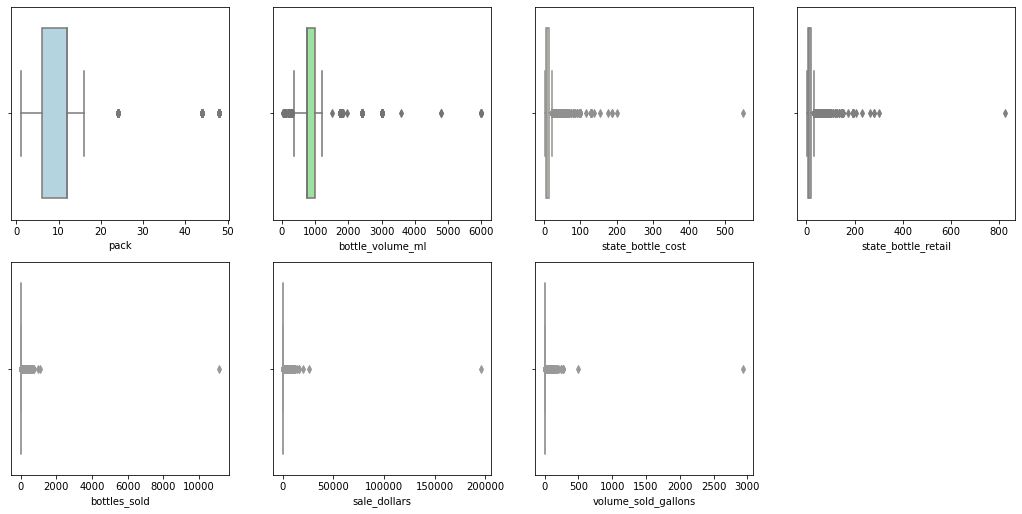

In [25]:
plt.figure(figsize=(18, 18))
plt.subplot(4,4,1)
sns.boxplot(df['pack'], color='lightblue')
plt.subplot(4,4,2)
sns.boxplot(df['bottle_volume_ml'], color='lightgreen')
plt.subplot(4,4,3)
sns.boxplot(df['state_bottle_cost'], color='lightyellow')
plt.subplot(4,4,4)
sns.boxplot(df['state_bottle_retail'], color='lightgrey')
plt.subplot(4,4,5)
sns.boxplot(df['bottles_sold'], color='white')
plt.subplot(4,4,6)
sns.boxplot(df['sale_dollars'], color='white')
plt.subplot(4,4,7)
sns.boxplot(df['volume_sold_gallons'], color='white')

plt.show()

# Handling Outliers

**All Outliers In This Dataset Are Fair, Based On Practical Point of View**

**However, To Maximize The Analysis, Outliers In Volume Sold Are Separated As Rare Occurence (Unusually High Volume Sales)**

In [26]:
dfcopy = df.copy()

**Unusually High Volume**

In [27]:
vsg_iqr = (df['volume_sold_gallons'].quantile(0.75)-df['volume_sold_gallons'].quantile(0.25))
vsg_upper_fence = (1.5*vsg_iqr)+df['volume_sold_gallons'].quantile(0.75)
vsg_upper_fence

6.325

In [28]:
rare_occ = df[df['volume_sold_gallons']>vsg_upper_fence]

df.drop(rare_occ.index, inplace = True)

**Percentage Unusually High Volume Sales Per Total Volume Sold**

In [29]:
(rare_occ['volume_sold_gallons'].sum()/dfcopy['volume_sold_gallons'].sum()*100).round(2)

37.65

**Percentage Unusually High Volume Transaction**

In [30]:
(rare_occ['volume_sold_gallons'].count()/dfcopy['volume_sold_gallons'].count()*100).round(2)

4.62

# Binning

**Copy Original Data**

In [31]:
dfbin = df.copy()
dfcopybin = dfcopy.copy()

### Volume - Sales

**Category Name - Top Volume**

In [32]:
dfbin[['category_name', 'volume_sold_gallons']].groupby(['category_name']).sum().sort_values('volume_sold_gallons', ascending=False).head(7)

,volume_sold_gallons
category_name,
AMERICAN VODKAS,8319.75
CANADIAN WHISKIES,7979.20
80 PROOF,6529.39
SPICED RUM,4484.93
BOURBON WHISKIES,4307.60
BLENDED WHISKIES,4113.36
FLAVORED VODKA,3289.33


**Category Name - Top Volume - Including High Volume Sales (Outliers)**

In [33]:
dfcopybin[['category_name', 'volume_sold_gallons']].groupby(['category_name']).sum().sort_values('volume_sold_gallons', ascending=False).head(7)

,volume_sold_gallons
category_name,
AMERICAN VODKAS,15716.11
CANADIAN WHISKIES,14956.06
80 PROOF,11498.55
SPICED RUM,11082.00
BOURBON WHISKIES,5540.62
BLENDED WHISKIES,5164.94
WHISKEY LIQUEUR,5023.97


**Category Name - Top Sales**

In [34]:
dfbin[['category_name', 'sale_dollars']].groupby(['category_name']).sum().sort_values('sale_dollars', ascending=False).head(7)

,sale_dollars
category_name,
CANADIAN WHISKIES,447537.92
BOURBON WHISKIES,320990.11
AMERICAN VODKAS,303653.09
SPICED RUM,255928.26
WHISKEY LIQUEUR,215060.08
80 PROOF,212245.73
TENNESSEE WHISKIES,171636.65


**Category Name - Top Sales - Including High Volume Sales (Outliers)**

In [35]:
dfcopybin[['category_name', 'sale_dollars']].groupby(['category_name']).sum().sort_values('sale_dollars', ascending=False).head(7)

,sale_dollars
category_name,
CANADIAN WHISKIES,784585.28
SPICED RUM,661204.73
AMERICAN VODKAS,598593.23
BOURBON WHISKIES,432030.97
80 PROOF,353998.07
WHISKEY LIQUEUR,330774.76
TENNESSEE WHISKIES,270843.59


**Vendor Name - Top Volume**

In [36]:
dfbin[['vendor_name', 'volume_sold_gallons']].groupby(['vendor_name']).sum().sort_values('volume_sold_gallons', ascending=False).head(7)

,volume_sold_gallons
vendor_name,
DIAGEO AMERICAS,11973.26
LUXCO,8807.68
JIM BEAM BRANDS,6822.93
SAZERAC COMPANY,5195.36
SAZERAC NORTH AMERICA,4665.59
CONSTELLATION WINE COMPANY,4342.78
PERNOD RICARD USAAUSTIN NICHOLS,3998.01


**Vendor Name - Top Volume - Including High Volume Sales (Outliers)**

In [37]:
dfcopybin[['vendor_name', 'volume_sold_gallons']].groupby(['vendor_name']).sum().sort_values('volume_sold_gallons', ascending=False).head(7)

,volume_sold_gallons
vendor_name,
DIAGEO AMERICAS,21654.00
LUXCO,14033.87
SAZERAC COMPANY,10132.44
JIM BEAM BRANDS,9671.11
CONSTELLATION WINE COMPANY,8419.63
SAZERAC NORTH AMERICA,8108.19
PERNOD RICARD USAAUSTIN NICHOLS,6197.56


**Vendor Name - Top Sales**

In [38]:
dfbin[['vendor_name', 'sale_dollars']].groupby(['vendor_name']).sum().sort_values('sale_dollars', ascending=False).head(7)

,sale_dollars
vendor_name,
DIAGEO AMERICAS,937093.43
JIM BEAM BRANDS,389803.42
PERNOD RICARD USAAUSTIN NICHOLS,321956.64
SAZERAC COMPANY,301975.49
LUXCO,263422.39
BACARDI USA,229242.84
BROWN FORMAN CORPORATION,228499.33


**Vendor Name - Top Sales - Including High Volume Sales (Outliers)**

In [39]:
dfcopybin[['vendor_name', 'sale_dollars']].groupby(['vendor_name']).sum().sort_values('sale_dollars', ascending=False).head(7)

,sale_dollars
vendor_name,
DIAGEO AMERICAS,1618263.04
JIM BEAM BRANDS,541140.70
SAZERAC COMPANY,510166.07
PERNOD RICARD USAAUSTIN NICHOLS,496385.34
LUXCO,403655.47
BROWN FORMAN CORPORATION,339885.89
CONSTELLATION WINE COMPANY,328826.80


**Item Name - Top Volume**

In [40]:
dfbin[['item_description', 'volume_sold_gallons']].groupby(['item_description']).sum().sort_values('volume_sold_gallons', ascending=False).head(7)

,volume_sold_gallons
item_description,
BLACK VELVET,3697.64
CAPTAIN MORGAN,2933.08
HAWKEYE VODKA,2788.72
FIVE O'CLOCK,2456.52
JOSE CUERVO,2444.09
FIREBALL CINNAMON,2145.51
MCCORMICK VODKA,1937.76


**Item Name - Top Volume - Including High Volume Sales (Outliers)**

In [41]:
dfcopybin[['item_description', 'volume_sold_gallons']].groupby(['item_description']).sum().sort_values('volume_sold_gallons', ascending=False).head(7)

,volume_sold_gallons
item_description,
CAPTAIN MORGAN,9074.63
BLACK VELVET,8292.68
HAWKEYE VODKA,5545.81
FIREBALL CINNAMON,3909.45
JOSE CUERVO,3591.20
TITOS HANDMADE,3435.52
FIVE O'CLOCK,3235.09


**Item Name - Top Sales**

In [42]:
dfbin[['item_description', 'sale_dollars']].groupby(['item_description']).sum().sort_values('sale_dollars', ascending=False).head(7)

,sale_dollars
item_description,
CROWN ROYAL,210086.98
CAPTAIN MORGAN,190659.67
BLACK VELVET,149308.82
FIREBALL CINNAMON,147798.65
JACK DANIELS,141931.81
JOSE CUERVO,120741.77
HENNESSY VS,95398.23


**Item Name - Top Sales - Including High Volume Sales (Outliers)**

In [43]:
dfcopybin[['item_description', 'sale_dollars']].groupby(['item_description']).sum().sort_values('sale_dollars', ascending=False).head(7)

,sale_dollars
item_description,
CAPTAIN MORGAN,585388.44
CROWN ROYAL,353923.48
BLACK VELVET,306613.70
FIREBALL CINNAMON,253391.93
TITOS HANDMADE,238758.81
JACK DANIELS,231081.43
JOSE CUERVO,181281.23


**Create New Columns For Value Binning**

In [44]:
dfbin['category_volume'] = dfbin['category_name']
dfbin['category_sale'] = dfbin['category_name']
dfbin['vendor_volume'] = dfbin['vendor_name']
dfbin['vendor_sale'] = dfbin['vendor_name']
dfbin['item_volume'] = dfbin['item_description']
dfbin['item_sale'] = dfbin['item_description']

dfcopybin['category_volume'] = dfcopy['category_name']
dfcopybin['category_sale'] = dfcopy['category_name']
dfcopybin['vendor_volume'] = dfcopy['vendor_name']
dfcopybin['vendor_sale'] = dfcopy['vendor_name']
dfcopybin['item_volume'] = dfcopy['item_description']
dfcopybin['item_sale'] = dfcopy['item_description']

**Category, Vendor, Item List Based On Top Volume and Sales**

In [45]:
category_vol = ['AMERICAN VODKAS', 'CANADIAN WHISKIES', '80 PROOF', 'SPICED RUM', 'BOURBON WHISKIES', 'BLENDED WHISKIES', 'FLAVORED VODKA']
category_sale = ['CANADIAN WHISKIES', 'BOURBON WHISKIES', 'AMERICAN VODKAS', 'SPICED RUM', 'WHISKEY LIQUEUR', '80 PROOF', 'TENNESSEE WHISKIES']

vendor_vol = ['DIAGEO AMERICAS', 'LUXCO', 'JIM BEAM BRANDS', 'SAZERAC COMPANY', 'SAZERAC NORTH AMERICA', 'CONSTELLATION WINE COMPANY', 'PERNOD RICARD USAAUSTIN NICHOLS']
vendor_sale = ['DIAGEO AMERICAS', 'JIM BEAM BRANDS', 'PERNOD RICARD USAAUSTIN NICHOLS', 'SAZERAC COMPANY', 'LUXCO', 'BACARDI USA', 'BROWN FORMAN CORPORATION']

item_vol = ['BLACK VELVET', 'CAPTAIN MORGAN', 'HAWKEYE VODKA', "FIVE O'CLOCK", 'JOSE CUERVO', 'FIREBALL CINNAMON', 'MCCORMICK VODKA']
item_sale = ['CROWN ROYAL', 'CAPTAIN MORGAN', 'BLACK VELVET', 'FIREBALL CINNAMON', 'JACK DANIELS', 'JOSE CUERVO', "HENNESSY VS"]



category_vol_iclotl = ['AMERICAN VODKAS', 'CANADIAN WHISKIES', '80 PROOF', 'SPICED RUM', 'BOURBON WHISKIES', 'BLENDED WHISKIES', 'WHISKEY LIQUEUR']
category_sale_iclotl = ['CANADIAN WHISKIES', 'SPICED RUM', 'AMERICAN VODKAS', 'BOURBON WHISKIES', '80 PROOF', 'WHISKEY LIQUEUR', 'TENNESSEE WHISKIES']

vendor_vol_iclotl = ['DIAGEO AMERICAS', 'LUXCO', 'SAZERAC COMPANY', 'JIM BEAM BRANDS', 'CONSTELLATION WINE COMPANY', 'SAZERAC NORTH AMERICA', 'PERNOD RICARD USAAUSTIN NICHOLS']
vendor_sale_iclotl = ['DIAGEO AMERICAS', 'JIM BEAM BRANDS', 'SAZERAC COMPANY', 'PERNOD RICARD USAAUSTIN NICHOLS', 'LUXCO', 'BROWN FORMAN CORPORATION', 'CONSTELLATION WINE COMPANY']

item_vol_iclotl = ['CAPTAIN MORGAN', 'BLACK VELVET', 'HAWKEYE VODKA', 'FIREBALL CINNAMON', 'JOSE CUERVO', 'TITOS HANDMADE', "FIVE O'CLOCK"]
item_sale_iclotl = ['CAPTAIN MORGAN', 'CROWN ROYAL', 'BLACK VELVET', 'FIREBALL CINNAMON', "TITOS HANDMADE", 'JACK DANIELS', 'JOSE CUERVO']

**Change All Values In New Columns To Others, Except For Values In Top 7 Category/Vendor/Item**

In [46]:
dfbin['category_volume'] = np.where(dfbin['category_volume'].isin(category_vol), dfbin['category_volume'], 'Other')
dfbin['category_sale'] = np.where(dfbin['category_sale'].isin(category_sale), dfbin['category_sale'], 'Other')

dfbin['vendor_volume'] = np.where(dfbin['vendor_volume'].isin(vendor_vol), dfbin['vendor_volume'], 'Other')
dfbin['vendor_sale'] = np.where(dfbin['vendor_sale'].isin(vendor_sale), dfbin['vendor_sale'], 'Other')

dfbin['item_volume'] = np.where(dfbin['item_volume'].isin(item_vol), dfbin['item_volume'], 'Other')
dfbin['item_sale'] = np.where(dfbin['item_sale'].isin(item_sale), dfbin['item_sale'], 'Other')


dfcopybin['category_volume'] = np.where(dfcopybin['category_volume'].isin(category_vol), dfcopybin['category_volume'], 'Other')
dfcopybin['category_sale'] = np.where(dfcopybin['category_sale'].isin(category_sale), dfcopybin['category_sale'], 'Other')

dfcopybin['vendor_volume'] = np.where(dfcopybin['vendor_volume'].isin(vendor_vol), dfcopybin['vendor_volume'], 'Other')
dfcopybin['vendor_sale'] = np.where(dfcopybin['vendor_sale'].isin(vendor_sale), dfcopybin['vendor_sale'], 'Other')

dfcopybin['item_volume'] = np.where(dfcopybin['item_volume'].isin(item_vol), dfcopybin['item_volume'], 'Other')
dfcopybin['item_sale'] = np.where(dfcopybin['item_sale'].isin(item_sale), dfcopybin['item_sale'], 'Other')

# Add Columns

**Number of Bottles Sold In Whole Packs**

In [47]:
dfbin['sold_in_pack'] = ((dfbin['bottles_sold']/dfbin['pack']).apply(np.floor)*dfbin['pack'])
dfcopybin['sold_in_pack'] = ((dfcopybin['bottles_sold']/dfcopybin['pack']).apply(np.floor)*dfcopybin['pack'])

**Number of Bottles Sold In Partial**

In [48]:
dfbin['sold_in_partial'] = (dfbin['bottles_sold']%dfbin['pack'])
dfcopybin['sold_in_partial'] = (dfcopybin['bottles_sold']%dfcopybin['pack'])

**Sales Price Per Gallons**

In [49]:
dfbin['sale_price_per_gallon'] = (dfbin['sale_dollars']/dfbin['volume_sold_gallons']).round(2)
dfcopybin['sale_price_per_gallon'] = (dfcopybin['sale_dollars']/dfcopybin['volume_sold_gallons']).round(2)

**Retail Gross Profit**

In [50]:
dfbin['retail_gross_profit'] = (dfbin['sale_dollars']-dfbin['state_bottle_retail']).round(2)
dfcopybin['retail_gross_profit'] = (dfcopybin['sale_dollars']-dfcopybin['state_bottle_retail']).round(2)

**Store Cost Per Gallons**

In [51]:
dfbin['store_cost_per_gallons'] = (dfbin['state_bottle_retail']/dfbin['volume_sold_gallons']).round(2)
dfcopybin['store_cost_per_gallons'] = (dfcopybin['state_bottle_retail']/dfcopybin['volume_sold_gallons']).round(2)

### Stores Gross Profit Ratio Per Item

**Item Name - Store Gross Margin Ratio**

In [52]:
dfbin['retail_gpm_ratio'] = ((dfbin['sale_dollars']-dfbin['state_bottle_retail'])/dfbin['sale_dollars']).round(2)
dfcopybin['retail_gpm_ratio'] = ((dfcopybin['sale_dollars']-dfcopybin['state_bottle_retail'])/dfcopybin['sale_dollars']).round(2)

### Average Sales, Gross Profit, Gross Profit Margin, Cost of Goods Sold - By Category

**Average Store Cost Per Gallons By Category**

In [53]:
dfbin['avg_category_per_gallons'] = 0
dfcopybin['avg_category_per_gallons'] = 0

In [54]:
a = dfbin[['category_name', 'store_cost_per_gallons']].groupby(['category_name']).mean()
a_otl = dfcopybin[['category_name', 'store_cost_per_gallons']].groupby(['category_name']).mean()

In [55]:
dfbin = dfbin.sort_values(by='category_name')

for h in range (len(a)):
    for i in range (len(dfbin['avg_category_per_gallons'])):
        if dfbin['category_name'].iloc[i] == a.index[h]:
            dfbin['avg_category_per_gallons'].iloc[i] = a.store_cost_per_gallons[h]
            
dfbin = dfbin.sort_index()


dfcopybin = dfcopybin.sort_values(by='category_name')

for h in range (len(a_otl)):
    for i in range (len(dfcopybin['avg_category_per_gallons'])):
        if dfcopybin['category_name'].iloc[i] == a_otl.index[h]:
            dfcopybin['avg_category_per_gallons'].iloc[i] = a_otl.store_cost_per_gallons[h]
            
dfcopybin = dfcopybin.sort_index()

**Average Gross Profit Per Transaction By Category**

In [56]:
dfbin['avg_category_retail_gp'] = 0
dfcopybin['avg_category_retail_gp'] = 0

In [57]:
ab = dfbin[['category_name', 'retail_gross_profit']].groupby(['category_name']).mean()
ab_otl = dfcopybin[['category_name', 'retail_gross_profit']].groupby(['category_name']).mean()

In [58]:
dfbin = dfbin.sort_values(by='category_name')

for h in range (len(ab)):
    for i in range (len(dfbin['avg_category_retail_gp'])):
        if dfbin['category_name'].iloc[i] == ab.index[h]:
            dfbin['avg_category_retail_gp'].iloc[i] = ab.retail_gross_profit[h]
            
dfbin = dfbin.sort_index()


dfcopybin = dfcopybin.sort_values(by='category_name')

for h in range (len(ab_otl)):
    for i in range (len(dfcopybin['avg_category_retail_gp'])):
        if dfcopybin['category_name'].iloc[i] == ab_otl.index[h]:
            dfcopybin['avg_category_retail_gp'].iloc[i] = ab_otl.retail_gross_profit[h]
            
dfcopybin = dfcopybin.sort_index()

**Average Retail Gross Profit Margin By Category**

In [59]:
dfbin['avg_category_retail_gpm'] = 0
dfcopybin['avg_category_retail_gpm'] = 0

In [60]:
ac = dfbin[['category_name', 'retail_gpm_ratio']].groupby(['category_name']).mean()
ac_otl = dfcopybin[['category_name', 'retail_gpm_ratio']].groupby(['category_name']).mean()

In [61]:
dfbin = dfbin.sort_values(by='category_name')

for h in range (len(ac)):
    for i in range (len(dfbin['avg_category_retail_gpm'])):
        if dfbin['category_name'].iloc[i] == ac.index[h]:
            dfbin['avg_category_retail_gpm'].iloc[i] = ac.retail_gpm_ratio[h]
            
dfbin = dfbin.sort_index()


dfcopybin = dfcopybin.sort_values(by='category_name')

for h in range (len(ac_otl)):
    for i in range (len(dfcopybin['avg_category_retail_gpm'])):
        if dfcopybin['category_name'].iloc[i] == ac_otl.index[h]:
            dfcopybin['avg_category_retail_gpm'].iloc[i] = ac_otl.retail_gpm_ratio[h]
            
dfcopybin = dfcopybin.sort_index()

**Average Sales Price Per Gallons By Category**

In [62]:
dfbin['avg_category_sales_per_gallons'] = 0
dfcopybin['avg_category_sales_per_gallons'] = 0

In [63]:
ad = dfbin[['category_name', 'sale_price_per_gallon']].groupby(['category_name']).mean()
ad_otl = dfcopybin[['category_name', 'sale_price_per_gallon']].groupby(['category_name']).mean()

In [64]:
dfbin = dfbin.sort_values(by='category_name')

for h in range (len(ad)):
    for i in range (len(dfbin['avg_category_sales_per_gallons'])):
        if dfbin['category_name'].iloc[i] == ad.index[h]:
            dfbin['avg_category_sales_per_gallons'].iloc[i] = ad.sale_price_per_gallon[h]
            
dfbin = dfbin.sort_index()


dfcopybin = dfcopybin.sort_values(by='category_name')

for h in range (len(ad_otl)):
    for i in range (len(dfcopybin['avg_category_sales_per_gallons'])):
        if dfcopybin['category_name'].iloc[i] == ad_otl.index[h]:
            dfcopybin['avg_category_sales_per_gallons'].iloc[i] = ad_otl.sale_price_per_gallon[h]
            
dfcopybin = dfcopybin.sort_index()

**Save Data CSV for Further EDA**

In [65]:
df.to_csv('lsiowa_cleaned.csv', index = False) #df - cleaned data, outliers dropped
dfcopy.to_csv('lsiowa_cleaned_iclotl.csv', index = False) #dfcopy - cleaned data, outliers kept
dfbin.to_csv('lsiowa_bin.csv', index = False) #dfbin - df with additional columns and binning
dfcopybin.to_csv('lsiowa_cleaned_iclotl_bin.csv', index = False) #dfcopybin - dfcopy with additional columns and binning
rare_occ.to_csv('lsiowa_otl.csv', index = False) #rare_occ - outliers only